In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import numpy as np
import datetime as dt

## Image operations

In [15]:
img = cv2.imread('./images/img_1.jpg', cv2.IMREAD_COLOR)

In [16]:
# the typical approach is to take the input as a colored image, perfor the analysis and then turn the image back to the colored image

px = img[100,100] # px: pixel
print(px) # so this will tell us the pixel color code at the defined pixel

[255 255 255]


In [23]:
# changing the color code for the specified pixel

#roi = img[600:650, 550:670] # roi is the region of the image

img[200:350, 250:470] = [98,190,100] # roi is the region of the image
cv2.imshow('Image color change', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [24]:
# cropping a part of the image and pasting it in the same image

img = cv2.imread('./images/img_1.jpg', cv2.IMREAD_COLOR)

crop = img[200:300, 400:600]
img[100:200, 200:400] = crop
cv2.imshow('Crop image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Complex Image operation

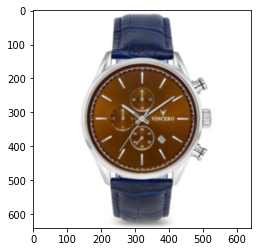

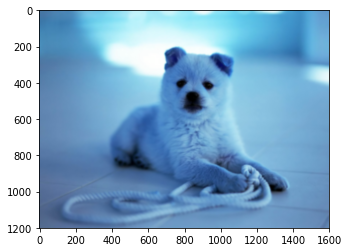

In [26]:
# using matplotlib
img_1 = cv2.imread('./images/img_1.jpg', cv2.IMREAD_COLOR)
img_2 = cv2.imread('./images/img_2.jpg', cv2.IMREAD_COLOR)
plt.imshow(img_1, interpolation='bicubic')
plt.show()

plt.imshow(img_2, interpolation='bicubic')
plt.show()

In [28]:
# addding pixels of two images
# cv2.add(img_1, img_2) : this function will add the pixel values and if the pixel value after addition exceed 255, then that value is replaced by 255

img_1 = cv2.imread('./images/img_1.jpg', cv2.IMREAD_COLOR)
img_1 = cv2.resize(img_1,(640,640))
img_2 = cv2.imread('./images/img_2.jpg', cv2.IMREAD_COLOR)
img_2 = cv2.resize(img_2,(640,640))
img_3 = cv2.add(img_2, img_1) 
cv2.imshow('Image opertaions',img_3)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [13]:
# adding one image on top of another

img_1 = cv2.imread('./images/img_1.jpg', cv2.IMREAD_COLOR)
img_1 = cv2.resize(img_1,(640,640))
img_2 = cv2.imread('./images/img_2.jpg', cv2.IMREAD_COLOR)
img_2 = cv2.resize(img_2,(640,640))

row, column, channel = img_1.shape
roi = img_1[0:row, 0:column]

img2gray = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY) # converting it to grayscale to perform the operation
ret, mask = cv2.threshold(img2gray, 100, 255, cv2.THRESH_BINARY_INV) # pixel value above 200 will be replaced by 255, anything less than 200 will be black
print(ret)
cv2.imshow('Masked', mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

100.0


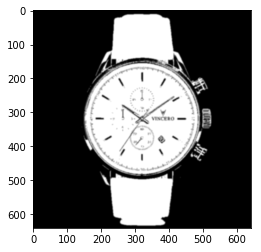

In [33]:
plt.imshow(mask,cmap='gray', interpolation='bicubic')
plt.show()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


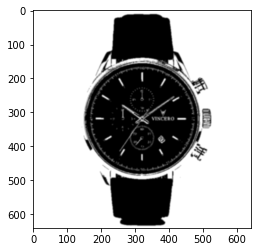

In [36]:
# we have to take out only the white portion in the image above

print(mask)
mask_inv = cv2.bitwise_not(mask) # inv stands for inverse

print(mask_inv)
plt.imshow(mask_inv,cmap='gray', interpolation='bicubic')
plt.show()

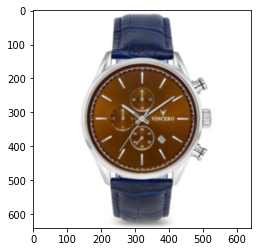

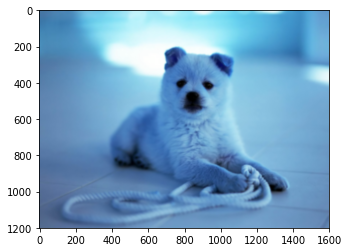

IMAGE 1 Shape :  (640, 640, 3)
IMAGE 2 Shape :  (1200, 1600, 3)


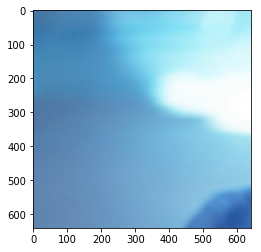

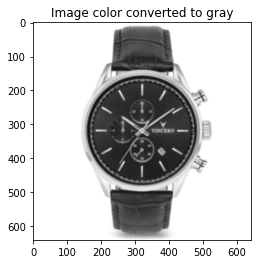

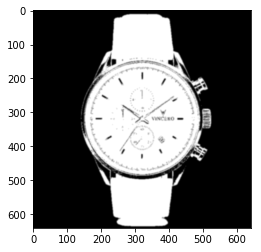

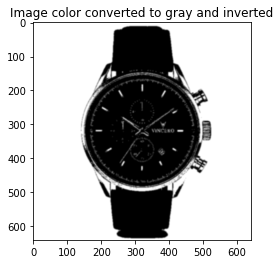

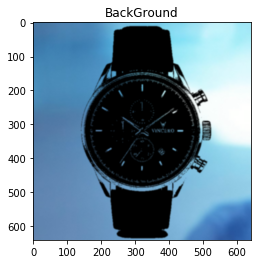

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


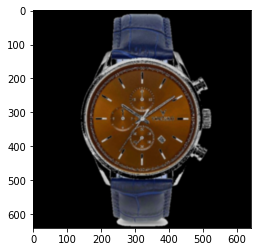

In [25]:
img_1 = cv2.imread('./images/img_1.jpg', cv2.IMREAD_COLOR) # watch image
img_2 = cv2.imread('./images/img_2.jpg', cv2.IMREAD_COLOR) # dog image
plt.imshow(img_1,cmap='gray', interpolation='bicubic')
plt.show()
plt.imshow(img_2,cmap='gray', interpolation='bicubic')
plt.show()

print('IMAGE 1 Shape : ', img_1.shape)
print('IMAGE 2 Shape : ', img_2.shape)

rows,cols,channels = img_1.shape # rows and columns
roi = img_2[0:rows, 0:cols ]
plt.imshow(roi,cmap='gray', interpolation='bicubic')
plt.show()


# Now create a mask of logo and create its inverse mask
img2gray = cv2.cvtColor(img_1,cv2.COLOR_BGR2GRAY)
plt.imshow(img2gray,cmap='gray', interpolation='bicubic')
plt.title('Image color converted to gray')
plt.show()

# add a threshold
ret, mask = cv2.threshold(img2gray, 220, 255, cv2.THRESH_BINARY_INV)
plt.imshow(mask,cmap='gray', interpolation='bicubic')
plt.show()

mask_inv = cv2.bitwise_not(mask)
plt.imshow(mask_inv,cmap='gray', interpolation='bicubic')
plt.title('Image color converted to gray and inverted')
plt.show() 

# Now black-out the area of logo in ROI
img2_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
plt.imshow(img2_bg,cmap='gray', interpolation='bicubic')
plt.title('BackGround')
plt.show()

# Take only region of logo from logo image.
print(mask)
img1_fg = cv2.bitwise_and(img_1,img_1,mask = mask)
plt.imshow(img1_fg,cmap='gray', interpolation='bicubic')
plt.show()

dst = cv2.add(img2_bg,img1_fg)
img_2[0:rows, 0:cols ] = dst

cv2.imshow('res',img_2)
cv2.waitKey(0)
cv2.destroyAllWindows()

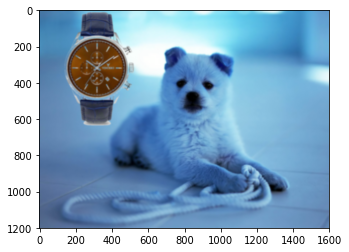

In [7]:
plt.imshow(img_2,cmap='gray', interpolation='bicubic')
plt.show()

## Thresholding
It means that everything is 0 or a 1 (or white or black pixel)

In [47]:
img = cv2.imread(r'./images/Book Image.JPG')

In [48]:
ret, val = cv2.threshold(img, 12, 255, cv2.THRESH_BINARY)

In [49]:
cv2.imshow('original', img)
cv2.imshow('threshold', val)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [50]:
greyscale = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, val = cv2.threshold(greyscale, 12, 255, cv2.THRESH_BINARY)

In [51]:
cv2.imshow('original',img)
cv2.imshow('threshold',val)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [63]:
# adpative threshold

gaus = cv2.adaptiveThreshold(greyscale, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,99,1)
# max val : 255, adaptiveMethod =  cv2.ADAPTIVE_THRESH_GAUSSIAN_C, thresholdType = cv2.THRESH_BINARY, 115 = blockSize, C = 1
cv2.imshow('adaptive threshold',gaus)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Color Filtering

In [14]:
cap = cv2.VideoCapture(0)

while True:
    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower_red = np.array([30,0,0]) # we generally toggle the 'hue' component , 30 here
    upper_red = np.array([255,255,255])
    
    mask = cv2.inRange(hsv, lower_red, upper_red) # mask will be everything identical to frame
    fil_img = cv2.bitwise_and(frame, frame, mask = mask)

    cv2.imshow('mask', mask)
    cv2.imshow('image after filtering', fil_img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
cv2.destroyAllWindows()   
cv2.waitKey(0)
cap.release()

## BLURRING AND SMOOTHING : 

- https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html

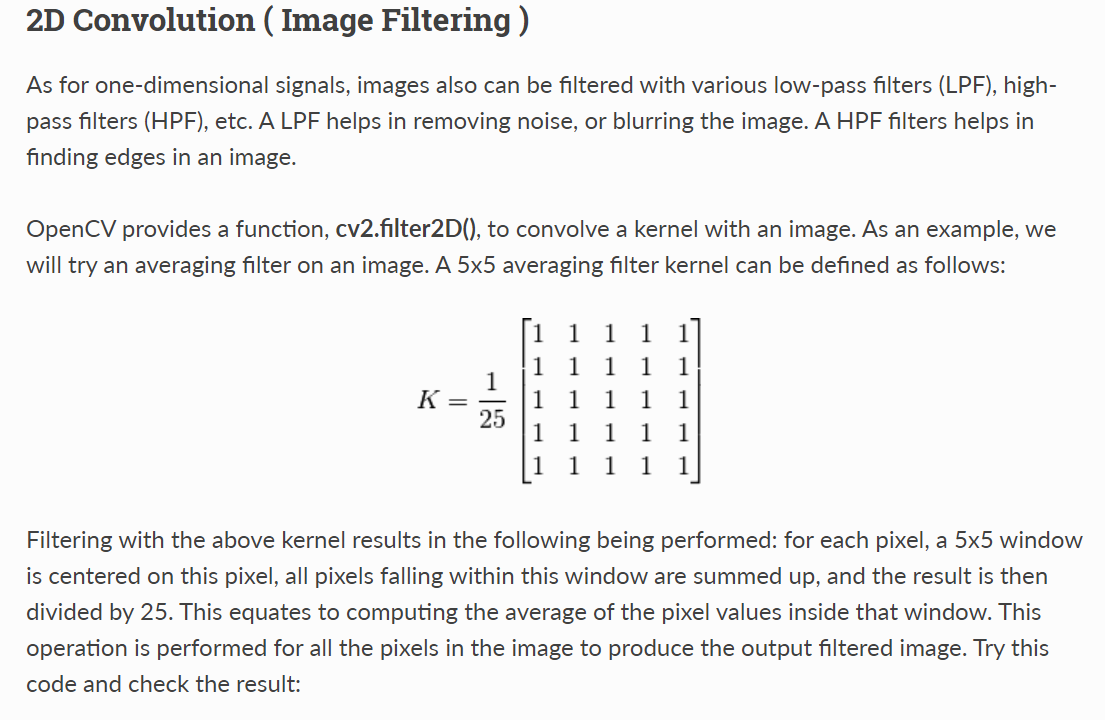

In [19]:
cap = cv2.VideoCapture(0)

while True:
    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower_red = np.array([150,150,50]) # we generally toggle the 'hue' component , 30 here
    upper_red = np.array([180,255,150])
    
    mask = cv2.inRange(hsv, lower_red, upper_red) # mask will be everything identical to frame
    fil_img = cv2.bitwise_and(frame, frame, mask = mask)
    
    kernel = np.ones((15,15), np.float32)/225 # 225: 15 * 15
    kernel_img = cv2.filter2D(fil_img,-1,  kernel)
    
    
    cv2.imshow('mask', mask)
    cv2.imshow('image after filtering', fil_img)
    cv2.imshow('image after smoothing', kernel_img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
cv2.destroyAllWindows()   
cv2.waitKey(0)
cap.release()

## Morphological Transformations

## IMAGES - Read, Write and Show images

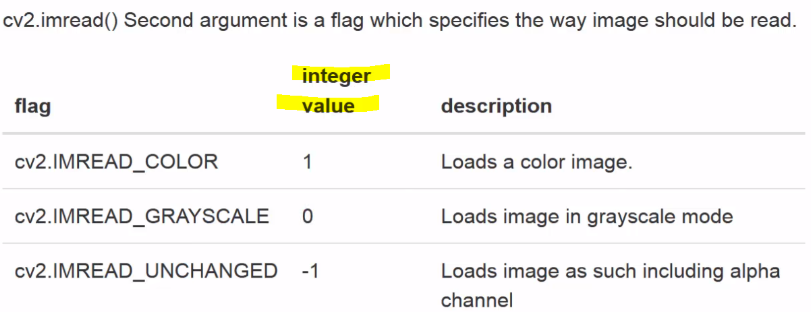

In [8]:
# Read Image
img = cv2.imread('./images/baboon.jpg', 1) #img will be equal to 'NONE' when the file path specified is incorrect

# Show Image
cv2.imshow('image', img)

cv2.waitKey(5000) 
# here we specify 5000, it means that the popup window will close in span of 5 seconds
# But if we say waitKey(0), then the pop up window wont close automatically, as we need to close the window manually

cv2.destroyAllWindows()

print(img[0]) #gives us the pixel value of the image
print(img.shape)

# Writing Image
cv2.imwrite('./images/Satwik_copy.jpg', img) # 'Satwik_copy.jpg' : name of the file

[[101 150 160]
 [ 12  61  71]
 [  0  44  57]
 ...
 [ 52 120 127]
 [ 90 164 146]
 [120 195 167]]
(512, 512, 3)


True

In [34]:
# Wait key functionality
img = cv2.imread('./images/baboon.jpg', 1) #img will be equal to 'NONE' when the file path specified is incorrect
cv2.imshow('image', img)


key_pressed  = cv2.waitKey(0)  # key_pressed has the key which the user has presssed
if key_pressed == 27: # pressed ESC key : ASCII CODE 27 ==> https://theasciicode.com.ar/ascii-control-characters/escape-ascii-code-27.html
    cv2.destroyAllWindows()
else:
    print('Please press escape to close the window')

cv2.destroyAllWindows()

# another method of getting the key pressed is 'ord': ord('s')

error: OpenCV(4.1.0) C:\projects\opencv-python\opencv\modules\highgui\src\window.cpp:352: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


## VIDEO - Read

In [19]:
## READING AND WRITIMG VIDEOS USING WEBCAM


video = cv2.VideoCapture(0)

while(True):
    
    # ret: gives us a true or a false value, frame: get frame
    ret, frame = video.read() # ret = 'True' if frame available
    
    #changing the color of the frame to gray
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Geting the height and width of the frame captured
    print('HEIGHT : ', video.get(cv2.CAP_PROP_FRAME_HEIGHT)) # 640 x 480 is the height and width of the frame by default
    print('WEIGHT : ', video.get(cv2.CAP_PROP_FRAME_WIDTH))
          
    cv2.imshow('video frame reading', gray)
    if cv2.waitKey(1) & 0xFF == ord('s'):
        break
        
video.release() 
cv2.destroyAllWindows()

HEIGHT :  480.0
WEIGHT :  640.0
HEIGHT :  480.0
WEIGHT :  640.0
HEIGHT :  480.0
WEIGHT :  640.0
HEIGHT :  480.0
WEIGHT :  640.0
HEIGHT :  480.0
WEIGHT :  640.0
HEIGHT :  480.0
WEIGHT :  640.0
HEIGHT :  480.0
WEIGHT :  640.0
HEIGHT :  480.0
WEIGHT :  640.0
HEIGHT :  480.0
WEIGHT :  640.0
HEIGHT :  480.0
WEIGHT :  640.0
HEIGHT :  480.0
WEIGHT :  640.0
HEIGHT :  480.0
WEIGHT :  640.0
HEIGHT :  480.0
WEIGHT :  640.0
HEIGHT :  480.0
WEIGHT :  640.0
HEIGHT :  480.0
WEIGHT :  640.0
HEIGHT :  480.0
WEIGHT :  640.0
HEIGHT :  480.0
WEIGHT :  640.0
HEIGHT :  480.0
WEIGHT :  640.0
HEIGHT :  480.0
WEIGHT :  640.0


In [23]:
## READING USING STORED VIDEO

video = cv2.VideoCapture('./images/test.avi')


# video.isOpened() gives True if the file path is correct
# video.isOpened() gives False if the file path is not correct
print('video.isOpened() : ', video.isOpened())

while(video.isOpened()):
    
    ret, frame = video.read()
    if ret == True:
        cv2.imshow('video frame reading', frame)
        if cv2.waitKey(1) & 0xFF == ord('s'):
            break
     
    else:
        break
        
video.release() 
cv2.destroyAllWindows()


video.isOpened() :  False


## VIDEO - WRITE Locally

In [21]:
# fourcc conversion: FOURCC is short for "four character code" - an identifier for a video codec, compression format, color or pixel format used in media files

# writing the webcam captured video in the local system

video = cv2.VideoCapture(0)
fourcc = cv2.VideoWriter_fourcc('X','V','I','D') # https://www.fourcc.org/xvid/
out = cv2.VideoWriter('./images/My_video_made.avi', fourcc, 20, (640,480) ) # 20 : frames per second; (640,480) : size of the frame

print('video.isOpened() : ', video.isOpened())
while(video.isOpened()):
    ret, frame = video.read()
    if ret == True:
        cv2.imshow('video frame reading', frame)
        out.write(frame)
        if cv2.waitKey(1) & 0xFF == ord('s'):
            break
    else:
        break

video.release()
cv2.destroyAllWindows()

video.isOpened() :  True


## DRAWING AND WRITING ON IMAGES

##### cv2.line() : 
Used to draw line on an image.
##### cv2.rectangle() :
Used to draw rectangle on an image.
##### cv2.circle() : 
Used to draw circle on an image.
##### cv2.putText() :
Used to write text on image.

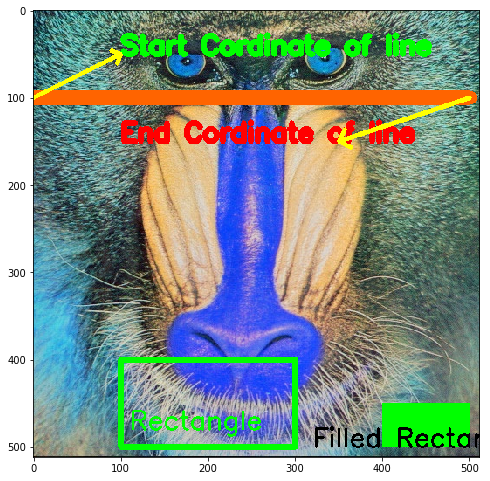

In [100]:
# draw a line

img = cv2.imread('./images/Satwik_copy.jpg', 1)
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.line(img, (0,100), (500,100), (255,100,0), 15) 
# (0,100) : start cordinate
# ((500,100)) : end cordinate
# (255,0,0) : its the color code
# 15: line width


cv2.putText(img, 'Start Cordinate of line', (100,50),font, 1 ,(0,255,0), 5) 
# (100,50) : cordinates to put the text 

cv2.putText(img, 'End Cordinate of line', (100,150),font, 1 ,(255,0,0), 5)

# Drawing an arrowed line
cv2.arrowedLine(img, (0,100), (100,50), (255,255,0), 4)
cv2.arrowedLine(img, (500,100), (350,150), (255,255,0), 4)

# Drawing a rectangle on an image
cv2.rectangle(img, (100,500),(300,400), (0,255,0), 5)
cv2.putText(img, 'Rectangle', (110,480),font, 1 ,(0,255,0), 2)

# drawing a rectangle and filling it
cv2.rectangle(img, (400,500),(500,450), (0,255,0), -1)
cv2.putText(img, 'Filled Rectangle', (320,500),font, 1 ,(0,0,0), 2)

# image display
plt.figure(figsize=(8,15))
plt.imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()


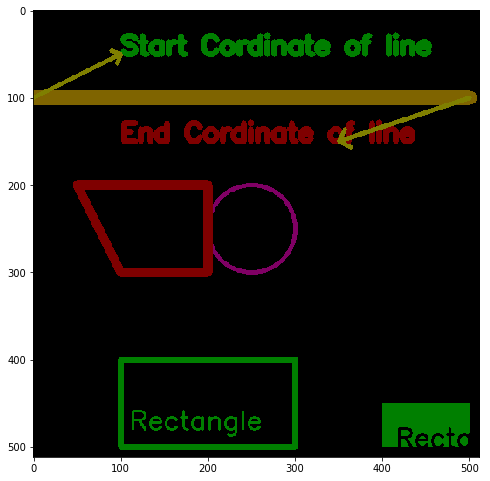

In [128]:
# draw a line

img = np.zeros([512,512,3], np.int8)
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.line(img, (0,100), (500,100), (255,100,0), 15) 

cv2.putText(img, 'Start Cordinate of line', (100,50),font, 1 ,(0,255,0), 5) 
# (100,50) : cordinates to put the text 

cv2.putText(img, 'End Cordinate of line', (100,150),font, 1 ,(255,0,0), 5)

# Drawing an arrowed line
cv2.arrowedLine(img, (0,100), (100,50), (255,255,0), 4)
cv2.arrowedLine(img, (500,100), (350,150), (255,255,0), 4)

# Drawing a rectangle on an image
cv2.rectangle(img, (100,500),(300,400), (0,255,0), 5)
cv2.putText(img, 'Rectangle', (110,480),font, 1 ,(0,255,0), 2)

# drawing a rectangle and filling it
cv2.rectangle(img, (400,500),(500,450), (0,255,0), -1)
cv2.putText(img, 'Filled Rectangle', (320,500),font, 1 ,(0,0,0), 2)

# drawing a circle
cv2.circle(img, (250,250),50, (255,0,100),3) # center cordicates (100,100), radius  = 50, -1 : negetive linewidth fills the circle

# draw a POLYGON
pts = np.array([[100,300],[200,300],[200,200],[200,200],[100,200], [50,200]], np.int32)
#pts = pts.reshape(-1,1,2) # given in the documentation, you should convert
cv2.polylines(img, [pts],True, (255,0,0), 10, -1) # center cordicates (100,100),True: joins the first and last point


# image display
plt.figure(figsize=(8,15))
plt.imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()


## SETTING THE CAMERA PARAMETERS

In [134]:
# setting the height and width of the video being captured

print('default settings')
video = cv2.VideoCapture(0)
print('Height : ', video.get(cv2.CAP_PROP_FRAME_HEIGHT))
print('Width : ', video.get(cv2.CAP_PROP_FRAME_WIDTH))

# chaning the height and the widht using set
print('\nseting the values as 1000,1000')
video.set(cv2.CAP_PROP_FRAME_HEIGHT, 1000)
video.set(cv2.CAP_PROP_FRAME_WIDTH, 1000)
print('Height : ', video.get(cv2.CAP_PROP_FRAME_HEIGHT))
print('Width : ', video.get(cv2.CAP_PROP_FRAME_WIDTH))

# The property like height and width are also aaaociated with the numbers in set function, so alternate way of writing the abpve lines of code
print('\nseting the values as 500,1000')
video.set(3,500)
video.set(4,1000)
print('Height : ', video.get(cv2.CAP_PROP_FRAME_HEIGHT))
print('Width : ', video.get(cv2.CAP_PROP_FRAME_WIDTH))


default settings
Height :  480.0
Width :  640.0

seting the values as 1000,1000
Height :  540.0
Width :  960.0

seting the values as 500,1000
Height :  480.0
Width :  640.0


OUTPUT:
Here we see that even we have set the values to some random number but the camera is setting the height and width to the resolution that is available with it


## SHOWING THE DATE-TIME ON THE VIDEOS

In [2]:
video = cv2.VideoCapture(0)
video.set(cv2.CAP_PROP_FRAME_HEIGHT, 1000)
video.set(cv2.CAP_PROP_FRAME_WIDTH, 1000)

temp = 1

while(video.isOpened()):
    ret, frame = video.read()
    if ret == True:
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(frame, str(dt.datetime.now()) ,(600,50),font,1,(0,255,0),3 ) # NOTE: used Date time as string as the parameter expects a string value
        cv2.imshow('VIDEO', frame)
        if cv2.waitKey(1) & 0xFF == ord('s'):
            break
    
    else:
        break

video.release() 
cv2.destroyAllWindows()       

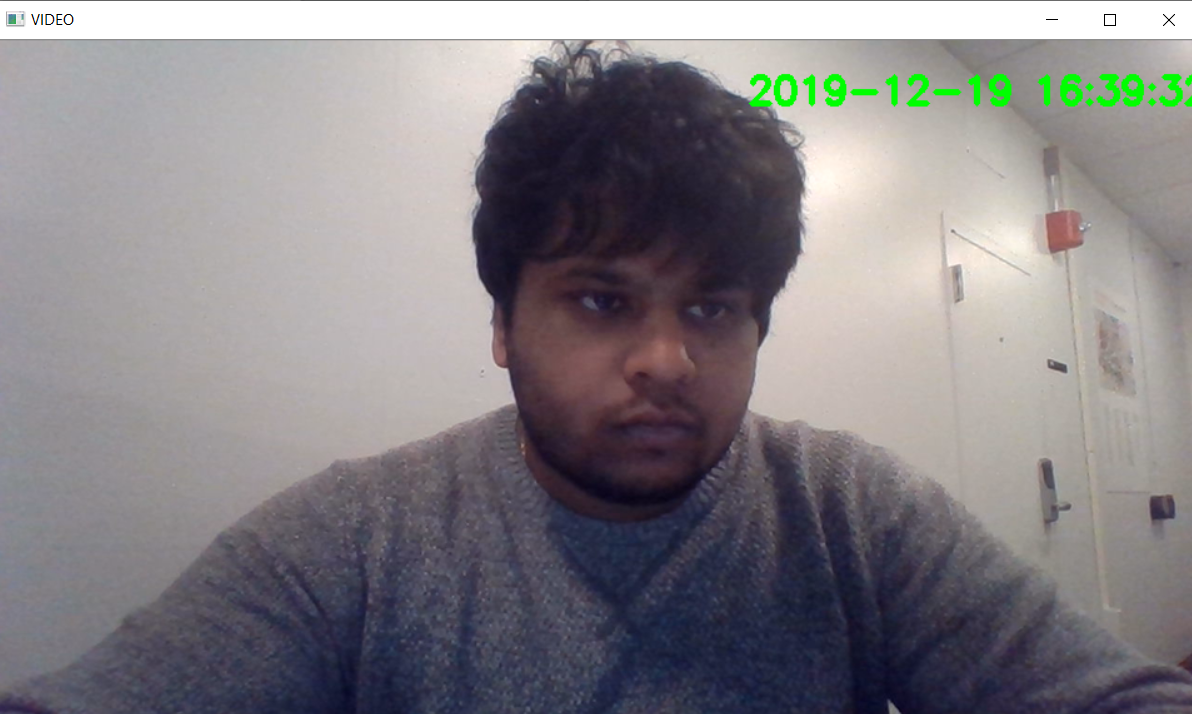

## HANDLE MOUSE EVENTS

>  ### Get the list of all the mouse events available

In [9]:


# dir is inbuilt function and it will show the classes and memeber functions inside cv2
all_cv2 = [i for i in dir(cv2)]
#print(all_cv2) # uncomment to run and see

# getting only with the evenets with events present in it
events = [i for i in dir(cv2) if 'EVENT' in i] # inside the cv2 package
print(events)

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


>  ### create a mouse call back function which will get executed whenever a mouse event happens

In [15]:
# we need to create a callaback function with the same number of parameters as specified below
# def callback_click_event('event taking place', 'x cordinate for the position being clicked','y cordinate for the position being clicked', flags, params)
    
def callback_click_event(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDOWN: # when left button is clicked
        print('x : ', x, ' y : ', y)
        str_xy = str(x) +' '+ str(y)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, str_xy, (x,y),font,.5,(0,255,0), 1)
        cv2.imshow('IMAGE', img) # window name =  IMAGE ==> it should be the same everywhere
    
    # adding new event to get the BGR VALUE
    if event == cv2.EVENT_RBUTTONDOWN:  # when right button is clicked
        blue = img[y,x,0]
        green = img[y,x,1]
        red = img[y,x,2]
        str_bgr = str(blue) +' '+ str(green) + ' '+ str(red)
        
        print('blue : ', blue, ' green : ', green, ' red : ', red)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, str_bgr, (x, y),font,.5,(255,255,0), 1)
        cv2.imshow('IMAGE', img)        
        

# drawing our own black image        
img = np.zeros([512,512,3], np.uint8)
cv2.imshow('IMAGE', img)

# put the above function created here
cv2.setMouseCallback('IMAGE', callback_click_event) # parameters: window name, call back fucntion name

# closing the image
cv2.waitKey(0)
cv2.destroyAllWindows()

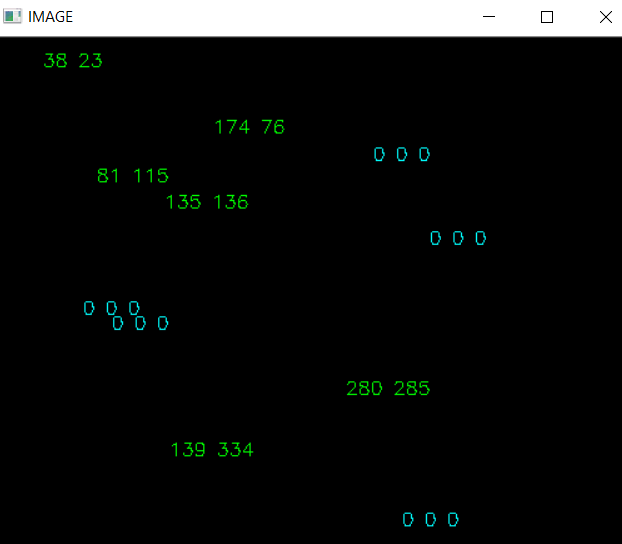

>  ### Get the pixel :
    - rgb value
    - cordinates of the clicked point

In [16]:
# so here we will first create a mouse call back function which will get executed whenever a mouse event happens

# we need to create a callaback function with the same number of parameters as specified below
# def callback_click_event('event taking place', 'x cordinate for the position being clicked','y cordinate for the position being clicked', flags, params)
    
def callback_click_event(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDOWN:
        print('x : ', x, ' y : ', y)
        str_xy = str(x) +' '+ str(y)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, str_xy, (x,y),font,.5,(0,255,0), 1)
        cv2.imshow('IMAGE', img) # window name =  IMAGE ==> it should be the same everywhere
    
    # adding new event to get the BGR VALUE
    if event == cv2.EVENT_RBUTTONDOWN:
        blue = img[y,x,0]
        green = img[y,x,1]
        red = img[y,x,2]
        str_bgr = str(blue) +' '+ str(green) + ' '+ str(red)
        
        print('blue : ', blue, ' green : ', green, ' red : ', red)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, str_bgr, (x, y),font,.5,(255,255,0), 1)
        cv2.imshow('IMAGE', img)        
        

# drawing our own black image        
img = cv2.imread('./images/Satwik_copy.jpg', 1)
cv2.imshow('IMAGE', img)

# put the above function created here
cv2.setMouseCallback('IMAGE', callback_click_event) # parameters: window name, call back fucntion name

# closing the image
cv2.waitKey(0)
cv2.destroyAllWindows()

x :  200  y :  98
x :  150  y :  187
x :  316  y :  255
x :  282  y :  387
blue :  24  green :  67  red :  238
x :  153  y :  327
blue :  80  green :  88  red :  241
blue :  96  green :  96  red :  220
blue :  148  green :  144  red :  196
blue :  153  green :  150  red :  135


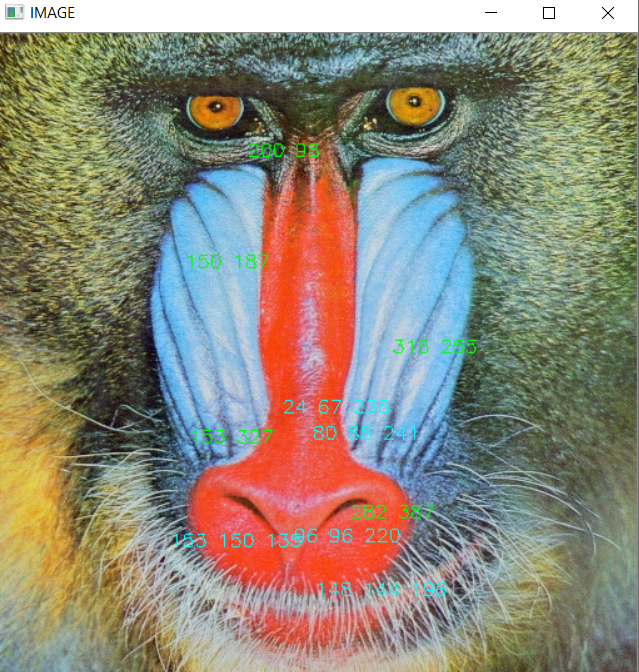

>  ### Joining the points on the image when its clicked

In [31]:
# Joining 2 points on the image whenever we click twice

points = []

def callback_click_event(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(img,(x,y), 3, (255,0,0), -1)    
        points.append((x,y)) # getting the points which are clicked 
        if len(points) >= 2:
            cv2.line(img, points[-1], points[-2], (255,100,0), 1) 
        cv2.imshow('IMAGE', img)

# drawing our own black image        
img = cv2.imread('./images/Image_1.jpg', 1)
cv2.imshow('IMAGE', img)

# put the above function created here
cv2.setMouseCallback('IMAGE', callback_click_event) # parameters: window name, call back fucntion name

# closing the image
cv2.waitKey(0)
cv2.destroyAllWindows()

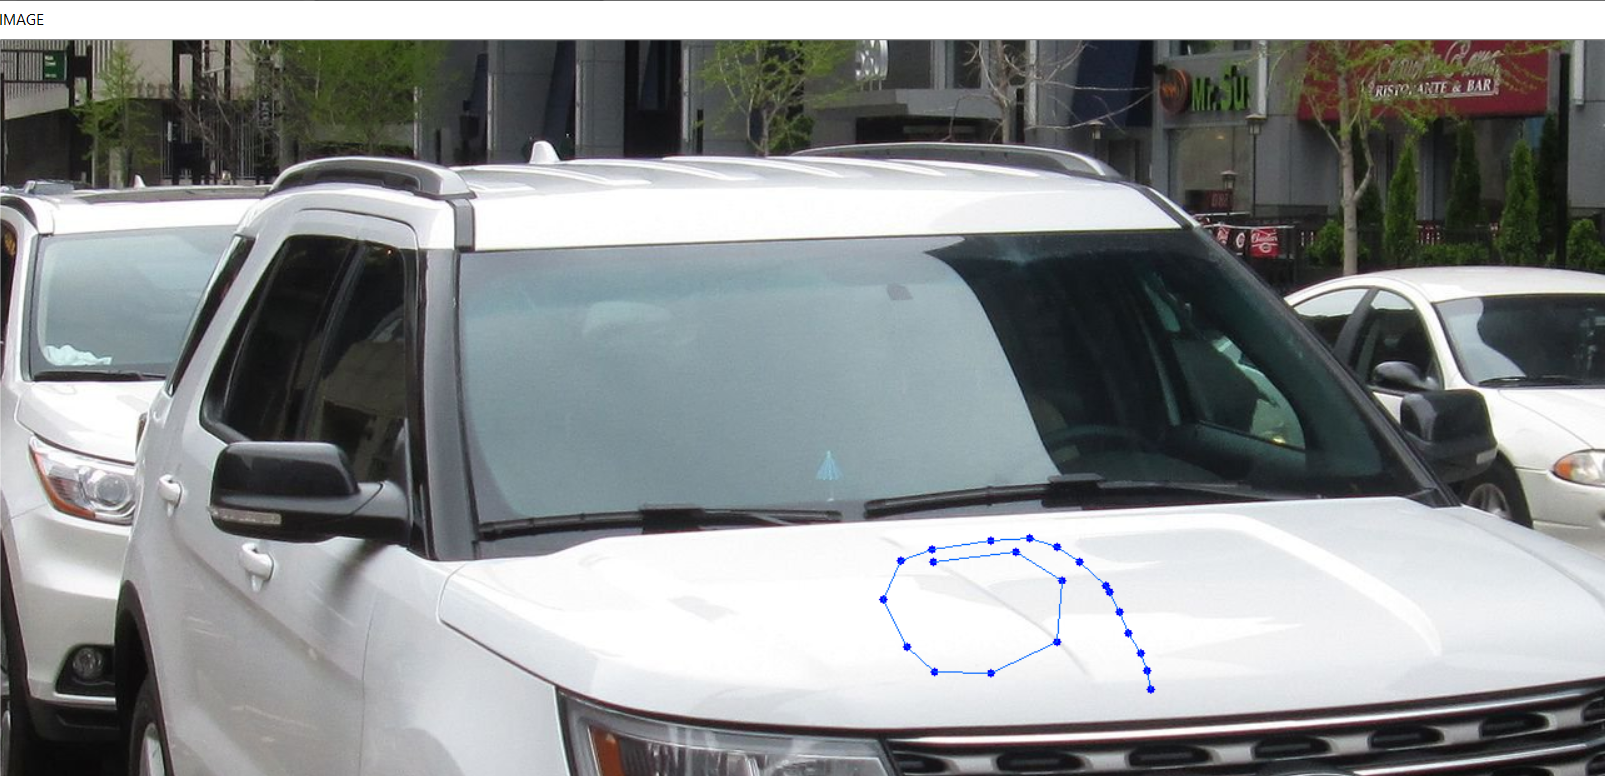

>  ### Showing the color of the pixel in a new tab when we click on it

In [58]:
# Joining 2 points on the image whenever we click twice

points = []

def callback_click_event(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDOWN:
        blue = img[y,x,0]
        green = img[y,x,1]
        red = img[y,x,2]
        str_bgr = str(blue) +' '+ str(green) + ' '+ str(red)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, 'you have clicked here', (x, y),font,.5,(0,255,0), 2)
        cv2.circle(img,(x,y), 3, (255,0,0), -1)  
        cv2.imshow('IMAGE', img) 
        
        # opening a new image to show 
        new_image = np.zeros((512,512,3), np.uint8)
        new_image[:] = [blue, green, red]
        cv2.imshow('color of the pixel', new_image)
        
# drawing our own black image        
img = cv2.imread('./images/Image_1.jpg', 1)
cv2.imshow('IMAGE', img)

# put the above function created here
cv2.setMouseCallback('IMAGE', callback_click_event) # parameters: window name, call back fucntion name

# closing the image
cv2.waitKey(0)
cv2.destroyAllWindows()

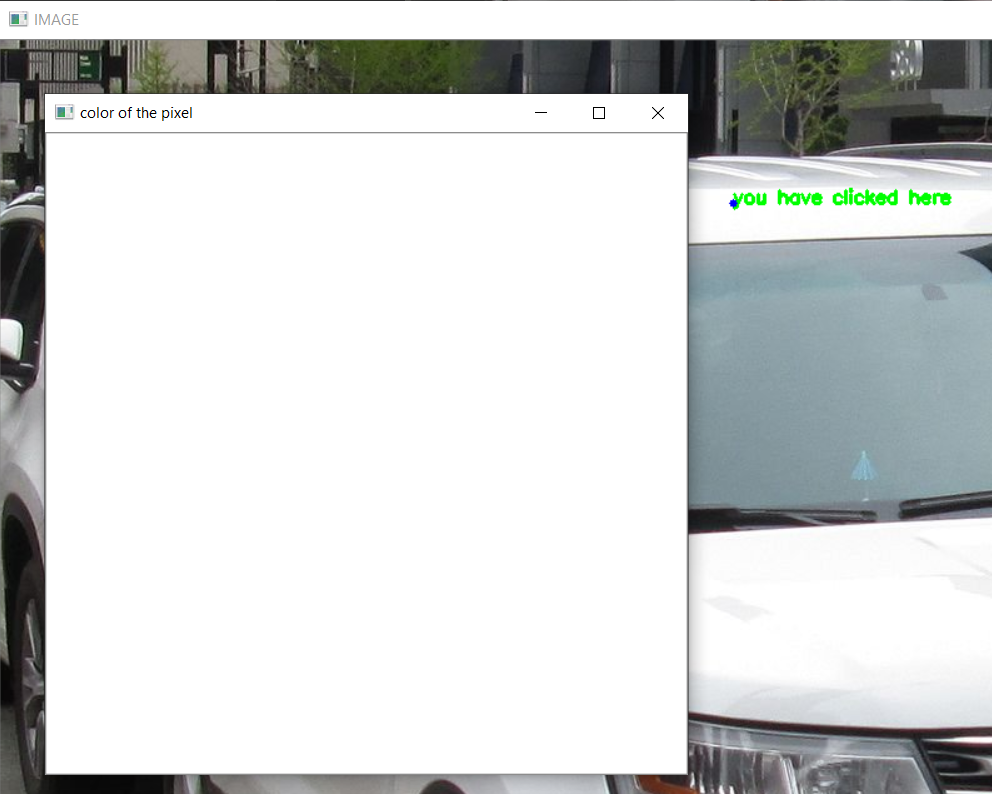

## ARITHMETIC OPERATIONS

> ### img.shape
returns a tuple of number of rows, columns, and channels

> ### img.size
returns Total number of pixels is accessed

> ### img.dtype
returns Image datatype is obtained

> ### cv2.split(img) 
output vector of arrays; the arrays themselves are reallocated, if needed

> ### cv2.merge((b,g,r)) 
The number of channels will be the total number of channels in the matrix array

> ### cv2.resize 
resize the image

> ### dst  cv2.add(img, img2) 
Calculates the per-element sum of two arrays or an array and a scalar.

> ### dst  cv2.addWeighted(img, .2, img2, .8, 0) 
Calculates the weighted sum of two arrays.

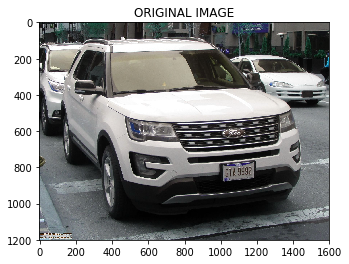

SHAPE :  (1200, 1600, 3)
SIZE :  5760000
DATA TYPE :  uint8

Blue:  [[110 105 106 ... 104 103 101]
 [116 115 118 ... 104 104 103]
 [111 113 116 ... 104 104 104]
 ...
 [101 136 155 ...  84  83  87]
 [ 84 127 165 ...  88  86  88]
 [100 116 154 ...  93  90  92]] 
Green:  [[103  98 102 ... 103 102 100]
 [112 111 114 ... 103 103 102]
 [109 113 117 ... 103 103 103]
 ...
 [126 161 179 ...  89  88  92]
 [108 152 189 ...  93  91  93]
 [124 141 175 ...  98  95  97]] 
Red:  [[110 105 108 ...  99  98  96]
 [118 117 120 ...  99  99  98]
 [115 119 121 ...  99  99  99]
 ...
 [152 187 203 ...  90  89  93]
 [136 178 213 ...  94  92  94]
 [152 167 202 ...  99  96  98]]

 SHOWING THE MERGE OPERATION FROM RGB PIXEL


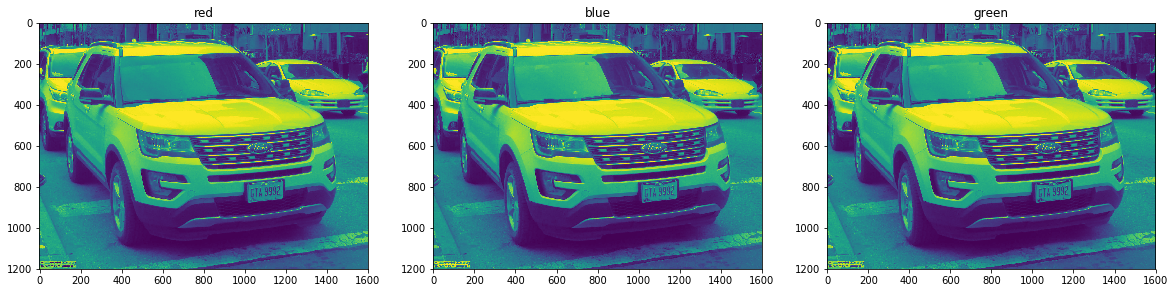

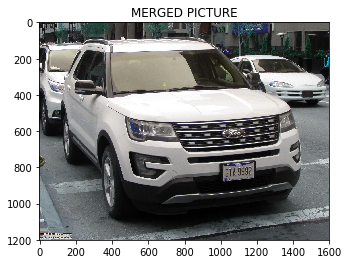

In [25]:
img = cv2.imread('./images/Image_1.jpg', 1)
plt.imshow(img)
plt.title('ORIGINAL IMAGE')
plt.show()

# using arithmetic fuctions here
print('SHAPE : ',img.shape)
print('SIZE : ', img.size)
print('DATA TYPE : ',img.dtype)

# split
b,g,r = cv2.split(img)
print('\nBlue: ', b, '\nGreen: ',g,'\nRed: ', r)

print('\n SHOWING THE MERGE OPERATION FROM RGB PIXEL')
fig = plt.figure(figsize=(20,100))
plt.subplot(1,3, 1)
plt.title('red')
plt.imshow(r)

plt.subplot(1, 3, 2)
plt.title('blue')
plt.imshow(b)

plt.subplot(1, 3, 3)
plt.title('green')
plt.imshow(g)
plt.show()

# merge
img_merge = cv2.merge((b,g,r))
plt.title('MERGED PICTURE')
plt.imshow(img_merge)
plt.show()


> ### ROI - region of intrest
    - Its the region that we are intrested in

In [29]:
# Now imagine our region of intrest is the ford logo on the front of the car

# using the click event to get the cordinates of the ford logo

def callback_click_event(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDOWN:
        print('x : ', x, ' y : ', y)
        str_xy = str(x) +' '+ str(y)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, str_xy, (x,y),font,.5,(0,255,0), 1)
        cv2.imshow('IMAGE', img) # window name =  IMAGE ==> it should be the same everywhere
    
    # adding new event to get the BGR VALUE
    if event == cv2.EVENT_RBUTTONDOWN:
        blue = img[y,x,0]
        green = img[y,x,1]
        red = img[y,x,2]
        str_bgr = str(blue) +' '+ str(green) + ' '+ str(red)
        
        print('blue : ', blue, ' green : ', green, ' red : ', red)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, str_bgr, (x, y),font,.5,(255,255,0), 1)
        cv2.imshow('IMAGE', img)        
        

# drawing our own black image        
img = cv2.imread('./images/Image_1.jpg', 1)
cv2.imshow('IMAGE', img)

# put the above function created here
cv2.setMouseCallback('IMAGE', callback_click_event) # parameters: window name, call back fucntion name

# closing the image
cv2.waitKey(0)
cv2.destroyAllWindows()


x :  990  y :  582
x :  991  y :  638
x :  1147  y :  640
x :  1147  y :  567


#### understanding cordinate system in ROI


https://stackoverflow.com/questions/15424852/region-of-interest-opencv-python

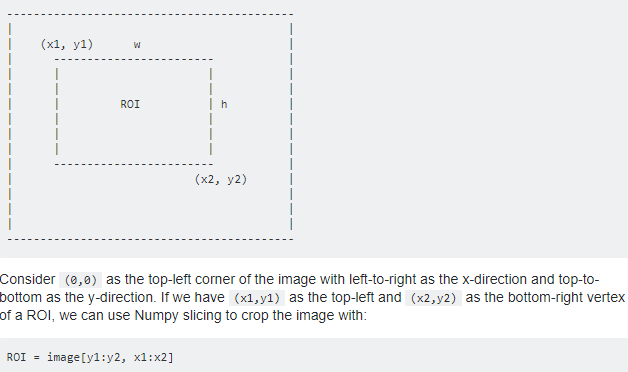


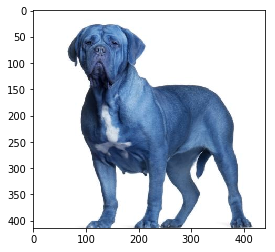

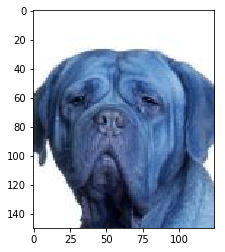

In [27]:
# using nhe above cordinates

img = cv2.imread('./images/dog.jpg', cv2.IMREAD_COLOR)
plt.imshow(img)
plt.show()

# cropping the face of the dog
ford_logo  = img[0:150, 75:200]
plt.imshow(ford_logo)
plt.show()

> ### ADDING TWO IMAGES
    - without weight
    - with weight

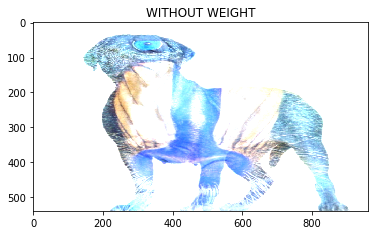

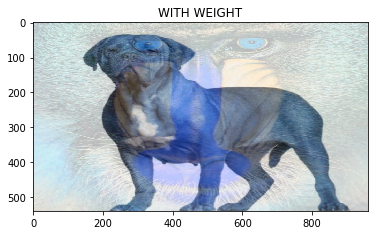

In [41]:
img_1 = cv2.imread('./images/dog.jpg', cv2.IMREAD_COLOR)
img_2 = cv2.imread('./images/Satwik_copy.jpg', cv2.IMREAD_COLOR)

#resize the image to the same size
img_1 = cv2.resize(img_1, (960, 540)) 
img_2 = cv2.resize(img_2, (960, 540)) 

added_img_without_weight = cv2.add(img_1, img_2)
plt.imshow(added_img_without_weight)
plt.title('WITHOUT WEIGHT')
plt.show()

added_img_with_weight = cv2.addWeighted(img_1,0.7, img_2,0.3, 0)  # 0.3: img_1 importance, 0.7: img_2 importance, 0: gamma value
plt.imshow(added_img_with_weight)
plt.title('WITH WEIGHT')
plt.show()

## BITWISE OPERATION ON IMAGES